# Environment Set up

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Access files
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/mgmt599/Sample - Superstore.csv', encoding='latin1')
# Installing Additional Packages
# Common packages for course
!pip install -q pandas numpy matplotlib seaborn
!pip install -q google-cloud-bigquery
!pip install -q google-generativeai

Mounted at /content/drive


In [3]:
import google.generativeai as genai
from google.colab import userdata

# Replace with your API key
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

model = genai.GenerativeModel('gemini-2.5-flash-preview-04-17')
response = model.generate_content("Hello, Gemini!")
print(response.text)

Hello! How can I help you today?


In [4]:
from google.colab import auth
auth.authenticate_user()

project_id = "focal-furnace-465023-g3"
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

# PART 3: AI-ASSISTED DATA EXPLORATION

## Exploration 2: Data Quality Assessment

In [6]:
%%bigquery --project focal-furnace-465023-g3

SELECT
  COUNT(*) AS total_rows,
  COUNTIF(Customer_ID IS NULL) AS null_count_Customer_ID,
  COUNTIF(Order_Date IS NULL) AS null_count_Order_Date,
  COUNTIF(`Row ID` IS NULL) AS `null_count_Row ID`,
  COUNTIF(`Order ID` IS NULL) AS `null_count_Order ID`,
  COUNTIF(`Ship Date` IS NULL) AS `null_count_Ship Date`,
  COUNTIF(`Ship Mode` IS NULL) AS `null_count_Ship Mode`,
  COUNTIF(`Customer Name` IS NULL) AS `null_count_Customer Name`,
  COUNTIF(Segment IS NULL) AS null_count_Segment,
  COUNTIF(Country IS NULL) AS null_count_Country,
  COUNTIF(City IS NULL) AS null_count_City,
  COUNTIF(State IS NULL) AS null_count_State,
  COUNTIF(`Postal Code` IS NULL) AS `null_count_Postal Code`,
  COUNTIF(Region IS NULL) AS null_count_Region,
  COUNTIF(`Product ID` IS NULL) AS `null_count_Product ID`,
  COUNTIF(Category IS NULL) AS null_count_Category,
  COUNTIF(`Sub-Category` IS NULL) AS `null_count_Sub-Category`,
  COUNTIF(`Product Name` IS NULL) AS `null_count_Product Name`,
  COUNTIF(Sales IS NULL) AS null_count_Sales,
  COUNTIF(Quantity IS NULL) AS null_count_Quantity,
  COUNTIF(Discount IS NULL) AS null_count_Discount,
  COUNTIF(Profit IS NULL) AS null_count_Profit,
  MIN(`Row ID`) AS min_row_id,
  MAX(`Row ID`) AS max_row_id,
  AVG(`Row ID`) AS avg_row_id,
  SUM(`Row ID`) AS sum_row_id,
  MIN(`Postal Code`) AS min_postal_code,
  MAX(`Postal Code`) AS max_postal_code,
  AVG(`Postal Code`) AS avg_postal_code,
  SUM(`Postal Code`) AS sum_postal_code,
  MIN(Sales) AS min_sales,
  MAX(Sales) AS max_sales,
  AVG(Sales) AS avg_sales,
  SUM(Sales) AS sum_sales,
  MIN(Quantity) AS min_quantity,
  MAX(Quantity) AS max_quantity,
  AVG(Quantity) AS avg_quantity,
  SUM(Quantity) AS sum_quantity,
  MIN(Discount) AS min_discount,
  MAX(Discount) AS max_discount,
  AVG(Discount) AS avg_discount,
  SUM(Discount) AS sum_discount,
  MIN(Profit) AS min_profit,
  MAX(Profit) AS max_profit,
  AVG(Profit) AS avg_profit,
  SUM(Profit) AS sum_profit,
  MIN(Order_Date) AS min_order_date,
  MAX(Order_Date) AS max_order_date,
  COUNT(DISTINCT Order_Date) AS distinct_order_dates,
  MIN(`Ship Date`) AS min_ship_date,
  MAX(`Ship Date`) AS max_ship_date,
  COUNT(DISTINCT `Ship Date`) AS distinct_ship_dates,
  COUNT(DISTINCT Customer_ID) AS distinct_customer_ids,
  COUNT(DISTINCT `Order ID`) AS distinct_order_ids,
  COUNT(DISTINCT `Ship Mode`) AS distinct_ship_modes,
  COUNT(DISTINCT `Customer Name`) AS distinct_customer_names,
  COUNT(DISTINCT Segment) AS distinct_segments,
  COUNT(DISTINCT Country) AS distinct_countries,
  COUNT(DISTINCT City) AS distinct_cities,
  COUNT(DISTINCT State) AS distinct_states,
  COUNT(DISTINCT Region) AS distinct_regions,
  COUNT(DISTINCT `Product ID`) AS distinct_product_ids,
  COUNT(DISTINCT Category) AS distinct_categories,
  COUNT(DISTINCT `Sub-Category`) AS distinct_sub_categories,
  COUNT(DISTINCT `Product Name`) AS distinct_product_names
FROM
  `focal-furnace-465023-g3`.lab1_eda.superstore_sales;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_count_Customer_ID,null_count_Order_Date,null_count_Row ID,null_count_Order ID,null_count_Ship Date,null_count_Ship Mode,null_count_Customer Name,null_count_Segment,null_count_Country,...,distinct_customer_names,distinct_segments,distinct_countries,distinct_cities,distinct_states,distinct_regions,distinct_product_ids,distinct_categories,distinct_sub_categories,distinct_product_names
0,9994,0,0,0,0,0,0,0,0,0,...,793,3,1,531,49,4,1862,3,17,1850


In [7]:
%%bigquery --project focal-furnace-465023-g3

SELECT *
FROM `focal-furnace-465023-g3`.lab1_eda.superstore_sales
WHERE Quantity < 0;

Query is running:   0%|          |

Downloading: |          |

,Customer_ID,Order_Date,Row ID,Order ID,Ship Date,Ship Mode,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [8]:
%%bigquery --project focal-furnace-465023-g3

SELECT *
FROM `focal-furnace-465023-g3`.lab1_eda.superstore_sales
WHERE Discount < 0 OR Discount > 1;

Query is running:   0%|          |

Downloading: |          |

,Customer_ID,Order_Date,Row ID,Order ID,Ship Date,Ship Mode,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [9]:
%%bigquery --project focal-furnace-465023-g3

SELECT *
FROM `focal-furnace-465023-g3`.lab1_eda.superstore_sales
WHERE Profit < 0 AND Sales > 0;

Query is running:   0%|          |

Downloading:   0%|          |

,Customer_ID,Order_Date,Row ID,Order ID,Ship Date,Ship Mode,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CT-11995,2014-05-07,6564,CA-2014-166086,2014-05-12,Standard Class,Carol Triggs,Consumer,United States,Lawrence,...,1841,East,FUR-TA-10003469,Furniture,Tables,Balt Split Level Computer Training Table,194.250,2,0.3,-38.8500
1,BF-11170,2017-12-14,7702,CA-2017-151799,2017-12-18,Standard Class,Ben Ferrer,Home Office,United States,Lawrence,...,1841,East,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,526.582,2,0.3,-52.6582
2,KT-16480,2014-05-12,2747,CA-2014-155887,2014-05-17,Standard Class,Kean Thornton,Consumer,United States,Franklin,...,2038,East,FUR-TA-10002228,Furniture,Tables,"Bevis Traditional Conference Table Top, Plinth...",700.056,3,0.3,-130.0104
3,EJ-14155,2016-12-01,8396,CA-2016-142594,2016-12-06,Second Class,Eva Jacobs,Consumer,United States,Franklin,...,2038,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,366.009,3,0.3,-47.0583
4,AR-10405,2017-08-27,378,US-2017-134481,2017-09-01,Standard Class,Allen Rosenblatt,Corporate,United States,Franklin,...,2038,East,FUR-TA-10004915,Furniture,Tables,"Office Impressions End Table, 20-1/2""H x 24""W ...",1488.424,7,0.3,-297.6848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,DP-13105,2016-09-23,9352,CA-2016-159009,2016-09-27,Standard Class,Dave Poirier,Corporate,United States,Seattle,...,98115,West,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,184.752,3,0.2,-20.7846
1867,JK-15625,2017-10-30,2280,CA-2017-142622,2017-11-02,First Class,Jim Karlsson,Consumer,United States,Seattle,...,98115,West,FUR-CH-10003833,Furniture,Chairs,Novimex Fabric Task Chair,97.568,2,0.2,-6.0980
1868,JK-15625,2017-10-30,2281,CA-2017-142622,2017-11-02,First Class,Jim Karlsson,Consumer,United States,Seattle,...,98115,West,FUR-CH-10004289,Furniture,Chairs,Global Super Steno Chair,614.272,8,0.2,-23.0352
1869,PB-18805,2017-12-05,9527,CA-2017-156958,2017-12-06,First Class,Patrick Bzostek,Home Office,United States,Seattle,...,98115,West,TEC-PH-10000148,Technology,Phones,Cyber Acoustics AC-202b Speech Recognition Ste...,31.176,3,0.2,-7.0146


In [11]:
%%bigquery --project focal-furnace-465023-g3

SELECT *
FROM `focal-furnace-465023-g3`.lab1_eda.superstore_sales
WHERE `Ship Date` < `Order_Date`;

Query is running:   0%|          |

Downloading: |          |

,Customer_ID,Order_Date,Row ID,Order ID,Ship Date,Ship Mode,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [12]:
%%bigquery --project focal-furnace-465023-g3

SELECT DISTINCT City, State, Region
FROM `focal-furnace-465023-g3.lab1_eda.superstore_sales`
ORDER BY State, City;


Query is running:   0%|          |

Downloading:   0%|          |

,City,State,Region
0,Auburn,Alabama,South
1,Decatur,Alabama,South
2,Florence,Alabama,South
3,Hoover,Alabama,South
4,Huntsville,Alabama,South
...,...,...,...
599,Superior,Wisconsin,Central
600,Waukesha,Wisconsin,Central
601,Wausau,Wisconsin,Central
602,West Allis,Wisconsin,Central


## EXPLORATION 3: QUICK INSIGHTS GENERATION

In [13]:
%%bigquery --project focal-furnace-465023-g3

SELECT
  SUM(Sales) AS total_sales,
(SUM(Profit) / SUM(Sales)) * 100 AS profit_margin_percentage,
  (
    SELECT
      Category
    FROM
      `focal-furnace-465023-g3`.lab1_eda.superstore_sales
    GROUP BY Category
    ORDER BY SUM(Sales) DESC
    LIMIT 1) AS top_category_by_sales
FROM
  `focal-furnace-465023-g3`.lab1_eda.superstore_sales;


Query is running:   0%|          |

Downloading:   0%|          |

,total_sales,profit_margin_percentage,top_category_by_sales
0,2.297201e+06,12.467217,Technology


## INITIAL VISUALIZATIONS

In [17]:
#sales distribution by category
%%bigquery --project focal-furnace-465023-g3
SELECT
  Category,
  SUM(Sales) AS Total_Sales
FROM
  `focal-furnace-465023-g3`.lab1_eda.superstore_sales
GROUP BY
  Category
ORDER BY
  Total_Sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Category,Total_Sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


In [16]:
#profit trends over time
%%bigquery --project focal-furnace-465023-g3

SELECT
  FORMAT_DATE('%Y-%m', Order_Date) AS Order_Month,
  SUM(Profit) AS Total_Profit
FROM

  `focal-furnace-465023-g3`.lab1_eda.superstore_sales
GROUP BY
  Order_Month
ORDER BY
  Order_Month ASC;

Query is running:   0%|          |

Downloading:   0%|          |

,Order_Month,Total_Profit
0,2014-01,2450.1907
1,2014-02,862.3084
2,2014-03,498.7299
3,2014-04,3488.8352
4,2014-05,2738.7096
5,2014-06,4976.5244
6,2014-07,-841.4826
7,2014-08,5318.1050
8,2014-09,8328.0994
9,2014-10,3448.2573


from matplotlib import pyplot as plt
_df_0['Total_Profit'].plot(kind='hist', bins=20, title='Total_Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total_Profit'].plot(kind='line', figsize=(8, 4), title='Total_Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
#sales by region
%%bigquery --project focal-furnace-465023-g3
SELECT
  Region,
  SUM(Sales) AS Total_Sales,
  SUM(Profit) AS Total_Profit
FROM
  `focal-furnace-465023-g3`.lab1_eda.superstore_sales
GROUP BY
  Region
ORDER BY
  Total_Sales DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,Region,Total_Sales,Total_Profit
0,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,Central,501239.8908,39706.3625
3,South,391721.9050,46749.4303


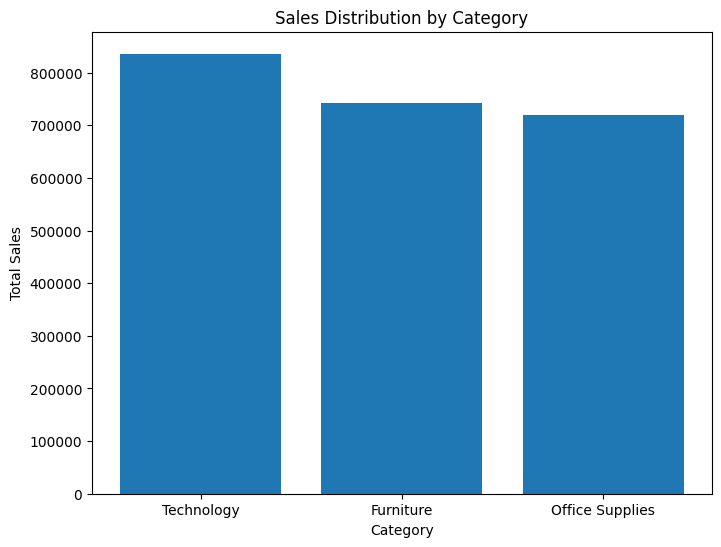

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the sales distribution by category query
category_sales_data = {'Category': ['Technology', 'Furniture', 'Office Supplies'],
                      'Total_Sales': [836154.0330, 741999.7953, 719047.0320]}
category_sales_df = pd.DataFrame(category_sales_data)

# Create a bar chart for sales distribution by category
plt.figure(figsize=(8, 6))
plt.bar(category_sales_df['Category'], category_sales_df['Total_Sales'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Category')
plt.show()

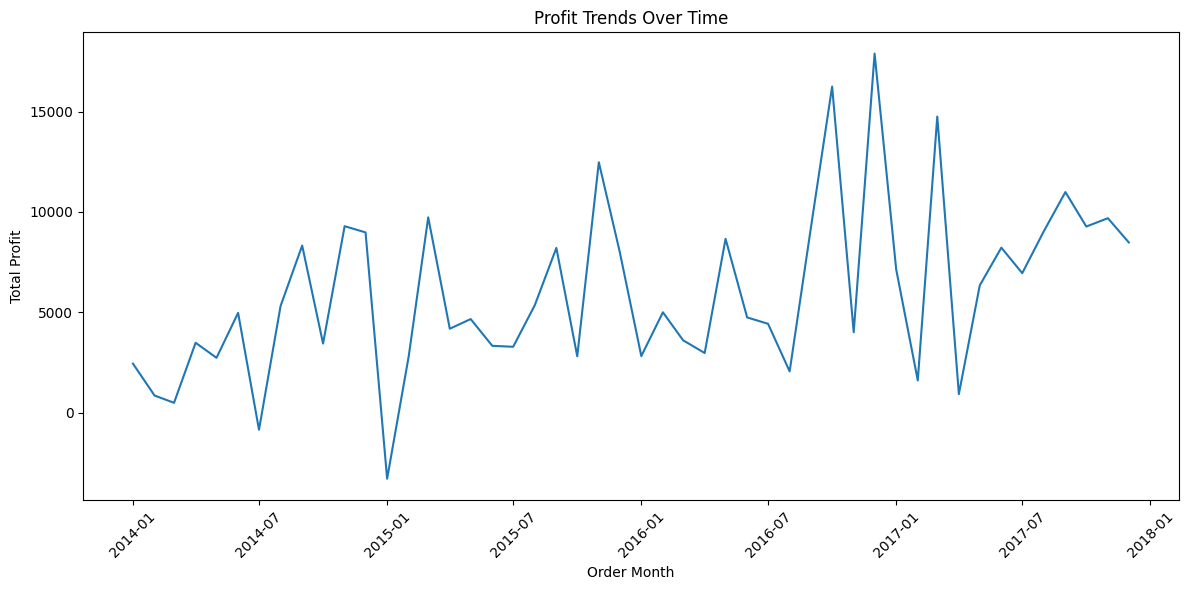

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the profit trends over time query
profit_trends_data = {'Order_Month': ['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
                      'Total_Profit': [2450.1907, 862.3084, 498.7299, 3488.8352, 2738.7096, 4976.5244, -841.4826, 5318.1050, 8328.0994, 3448.2573, 9292.1269, 8983.5699, -3281.0070, 2813.8508, 9732.0978, 4187.4962, 4667.8690, 3335.5572, 3288.6483, 5355.8084, 8209.1627, 2817.3660, 12474.7884, 8016.9659, 2824.8233, 5004.5795, 3611.9680, 2977.8149, 8662.1464, 4750.3781, 4432.8779, 2062.0693, 9328.6576, 16243.1425, 4011.4075, 17885.3093, 7140.4391, 1613.8720, 14751.8915, 933.2900, 6342.5828, 8223.3357, 6952.6212, 9040.9557, 10991.5556, 9275.2755, 9690.1037, 8483.3468]}
profit_trends_df = pd.DataFrame(profit_trends_data)
profit_trends_df['Order_Month'] = pd.to_datetime(profit_trends_df['Order_Month'])

# Create a line plot for profit trends over time
plt.figure(figsize=(12, 6))
plt.plot(profit_trends_df['Order_Month'], profit_trends_df['Total_Profit'])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.title('Profit Trends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

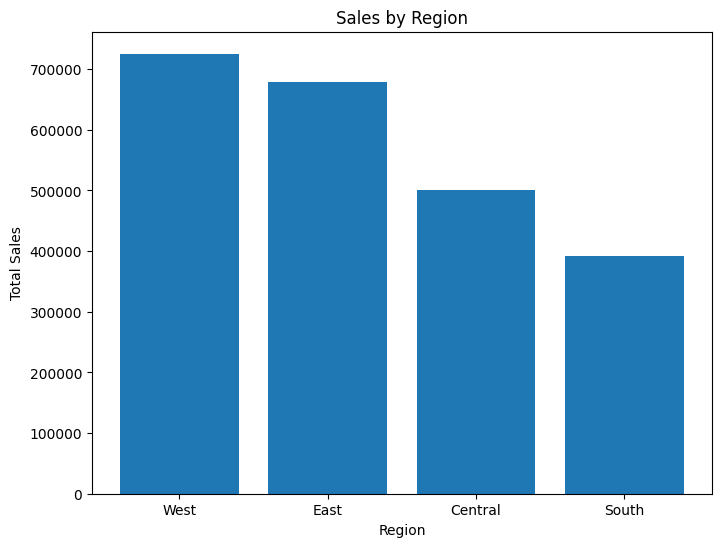

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the sales by region query
region_sales_data = {'Region': ['West', 'East', 'Central', 'South'],
                     'Total_Sales': [725457.8245, 678781.2400, 501239.8908, 391721.9050],
                     'Total_Profit': [108418.4489, 91522.7800, 39706.3625, 46749.4303]}
region_sales_df = pd.DataFrame(region_sales_data)

# Create a bar chart for sales by region
plt.figure(figsize=(8, 6))
plt.bar(region_sales_df['Region'], region_sales_df['Total_Sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')
plt.show()